In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt


## Monte Carlo Methods 

#### are a set of computational algorithms that use (repeated) random sampling to estimate unknown parameters.

* Very wide ranging
* Indispensable in physics, game theory, finance.
* Rely on RNG for simulations 


### Monte Carlo simulations with Python

_The name “Monte Carlo” - based on the name of a famous casino in Monaco, France -  sounds glamorous in many ways. According to legend, the mathematician Stanislaw Ulam (1909-1984), who was in the process of recovering from an illness, was playing solitaire. Pure combinatorial calculations of the success probability of the solitaire game became too lengthy, so he decided to calculate the probability by playing the game repeatedly. He played the game a hundred times and counted the number of successful plays. Thus was born the Monte Carlo method, which  established the idea that an integral, in this case the probability of success, can be viewed as an expected value of a function, and it can be estimated statistically._

#### What is a Monte Carlo Simulation?

The art of predicting an expected value using the principles of inferential statistics

__Inferential statistics__:

Make inference about the population based on the sample

* _Population_: universe of possible examples
* _Sample_: a subset of the population
    
Key facts:

* _population_ is distributed in a particular way, e.g. "normally distributed"
* _sample_ is _random_ and exhibits same properties as population



__In terms of simulation concepts, a Monte Carlo simulation can be viewed as a process that generates a large number of random scenarios that produce a distribution of outcomes and, in the end, the likelihood of the results shows which outcome is the most likely.__


__Properties__

* Draw (independent) samples from a random distribution
* Compute some measure at each draw
* Repeat many times
* Average/aggregate the derived data

## Applications

#### $\pi$ estimate

Reference:
http://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/Problems/Approximating_pi.html

In [2]:
N = 6
x = np.random.uniform(-1, 1, N) 

y = np.random.uniform(-1, 1, N) 


print(x)
print(y)

[-0.09054268  0.34626972  0.25514986 -0.17041369  0.67348113  0.39099418]
[-0.46732345 -0.47907833 -0.06188103  0.73795746  0.87412341  0.08241605]


In [3]:
# compute a criterion that makes sense in this context, 
# such as the distance of points to the origin
d = x**2 + y**2
print(d)

[0.22658918 0.34941876 0.06893071 0.57362204 1.21766857 0.15966885]


In [4]:
# Then we use Boolean indexing to discriminate between points 
# within and outside the unit circle:
q = (d <= 1) 
q


array([ True,  True,  True,  True, False,  True])

In [5]:
inside = 0
for i in range(q.size):
    if q[i]:
        inside += 1
print(f'darts that land inside: {inside}')

darts that land inside: 5


We assume the ratio of uniformly distributed points in the circle and in the plane is representative for the area of the unit circle and the square. 


Then we can statistically assess that $$\pi = 4*\frac{A_c}{A_s}$$ from the ratio of points within the circle/square. 

Thus:

In [6]:
pi = 4*q.sum()/q.size

In [7]:
print(pi)

3.3333333333333335


In [8]:
N = 1000
x = np.random.uniform(-1, 1, N) 

y = np.random.uniform(-1, 1, N) 

In [9]:
d = x**2 + y**2

In [10]:
q = (d <= 1)

In [11]:
inside = 0
for i in range(q.size):
    if q[i]:
        inside += 1
print(f'darts that land inside: {inside}')

darts that land inside: 799


In [12]:
pi = 4*q.sum()/q.size

In [13]:
print(pi)

3.196


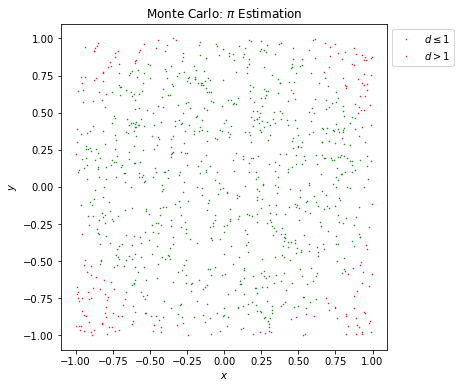

In [14]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x[q], y[q], '.', color='green', markersize=1, label=r'$d \leq 1$')
ax.plot(x[~q], y[~q], '.', color='red', markersize=1, label=r'$d > 1$')
ax.set_aspect('equal')
ax.set_title(r'Monte Carlo: $\pi$ Estimation')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(bbox_to_anchor=(1, 1), loc='upper left');

Law of large numbers says that the average of a large number of trials, $n$, approaches the expected (i.e. the true) value.

$$ <X_n> = \mu $$

i.e. as our random samples accumulate, the sample average as an estimate of the true mean gets better and better. A Similar result applies to the sample varaiance.

The LLN, magical as it is, does not tell us the rate at which the convergence takes place. How large does your sample need to be in order for your estimates to be close to the truth? 

The approximation error is
    
\begin{equation}
Error \approx \frac{1}{\sqrt{N}}
\end{equation}

This is saying that taking average of random samples is shrinking the standard deviation at a rate of $\frac{1}{\sqrt{N}}$, or equivalently, shrinking the variance at a rate of $\frac{1}{N}$, and the ditribution of sample average is roughly normal when $n$ is large.

Therefore major benefits comes at smaller sample sizes to moderate sample sizes; going from 100 to 200 samples brings more improvements to your estimates than going from 1000 to 1100 samples.

MC methods are useful for smulating "higher-dimensional" systems, with all sorts of random variables, with different probability distributions.

---

So, the approximation above is pretty good.

## More stochastic models


#### Simulating the rolling of a die

In [17]:
# Using randint()
def roll_die():
    return np.random.randint(1,7) # generate a number in [1,7) << excludes 7

#### Making random choices

The random module contains the choice() function for this purpose. This function can be used to choose a random element from a non-empty sequence.
This means that we are capable of picking a random character from a string or a random element from a list or a tuple.

In [18]:
# Using choice()
def roll_die_choice():
    return np.random.choice(range(1,7)) # choose numbers from [1,7) << excludes 7

In [19]:
# Test the process

def test_roll(N=10):
    for _ in range(N):  # note the _
        print(roll_die(), end=" ") 

At any stage you will not be able to predict what the next number will be - so the next number is a random variable.



#### Example

Using the die , carry out a sequence of 30 rolls with a view to obtaining either a three or a six. Each time that a three-spot face or a six-spot face occurs record a 1, to represent success. Each time that some other face of the die occurs record a 0, to represent failure. In this way you will generate a sequence of 1s and 0s.

By adding the 1s and 0s as you go along you can calculate the total number of successes after each roll. At each roll you can also calculate the proportion of rolls so far that have produced a three- or six-spot face. Letting P denote this proportion, plot a graph of P, on the vertical axis, against the number of rolls, on the horizontal axis. 

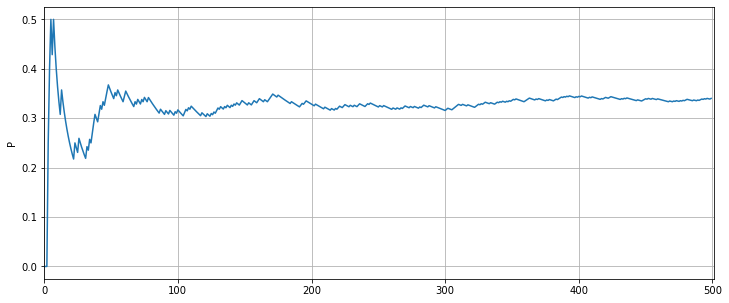

In [20]:
N = 500
running_total = np.zeros(N+1)
tot = 0
for i in range(1, N+1):
    if  roll_die() == 3 or roll_die() == 6:
        tot += 1
    running_total[i] = tot/i
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(running_total[1:], '-')
ax.set_xlim([0,N+1])
ax.set_ylabel('P')
ax.grid()

#### Example: rolling a die

Suppose you roll a die several times. What is the probablity that you get 11111 (five ones) in a row? Note that this is a pretty rare event!

The probability of rolling a $1$ is:

P(1) = $(\frac{1}{6})$

If you roll 5 times, all events are independent, then:

P(11111) = $(\frac{1}{6})^5$

#### Simulation

In [21]:
np.random.seed(123) # This makes python repeat the same numbers every time we run the program.
                    # You can choose any number to go inside the brackets of "seed".

def simulate_die(sequence, num_trials):
    """
    Simulate rolling a single die by counting.
    
    Input, a desired "sequence" and number of trials
    Output, estimated probability the sequence was generated
            by rolling the die.
    """
    num_succ= 0
    for i in range(num_trials): # loop over num trials
        result = ''
        for j in range(len(sequence)): # roll as many times as necessary 
            result += str(roll_die())

        if result == sequence:
            num_succ += 1
        est_prob = num_succ/num_trials
        
    return round(est_prob, 8)

In [22]:
# What is the probablity that you get 11111 (5 ones) in a row?

sequence = '11111'

In [23]:
trials = 1000

In [24]:
print (f'Estimated probability of getting {sequence} = ', simulate_die(sequence, trials))

Estimated probability of getting 11111 =  0.0


In [25]:
print (f'Actual probability of getting {sequence} =  {1/6**len(sequence):.6f}')

Actual probability of getting 11111 =  0.000129


In [26]:
N = 20

# generates numbers in [-1, 1]:
dart_positions = 2 * np.random.rand(N, 2) - 1  # 2D array

In [27]:
dart_positions


array([[ 0.43896402,  0.80065821],
       [-0.31103224, -0.55787131],
       [-0.85699444,  0.68350941],
       [ 0.04564604,  0.43857784],
       [-0.87184427,  0.69308385],
       [ 0.16539162, -0.76441156],
       [-0.003026  ,  0.19421877],
       [-0.31848979,  0.42223232],
       [ 0.16266734,  0.68082764],
       [ 0.72696714, -0.87551525],
       [ 0.29296066,  0.44522217],
       [-0.71475554,  0.76689686],
       [ 0.71294841, -0.72101527],
       [ 0.76656497,  0.29328539],
       [ 0.57356665,  0.59710181],
       [-0.67633593, -0.87465523],
       [ 0.27397601, -0.32550233],
       [-0.47908174, -0.74026944],
       [ 0.71875437,  0.14286431],
       [ 0.67341982,  0.11350194]])

In [28]:
# start the count with 0 - make loop logic below easier
Ncircle = [0] 

In [29]:
for x, y in dart_positions:
    if np.sqrt(x**2 + y**2) < 1:
        # another dart has fallen in the circle
        Ncircle.append(Ncircle[-1] + 1) 
    else:
        # the dart fell outside of the circle - Ncircle is unchanged
        Ncircle.append(Ncircle[-1])  
print(len(Ncircle))
Ncircle

21


[0, 1, 2, 2, 3, 3, 4, 5, 6, 7, 7, 8, 8, 8, 9, 10, 10, 11, 12, 13, 14]

In [30]:
running_estimate = []
# skip the inital 0-count
for index, n_circle in enumerate(Ncircle[1:]): 
    # index starts at 0, so we need to add 1
    running_estimate.append(4 * n_circle / (index + 1))
    if index < 20:
        print(f"{index}, {n_circle}, {running_estimate[index]:.4f}")

num_thrown = np.arange(1, N+1) # 1, 2, ..., N
print(running_estimate[-1])

0, 1, 4.0000
1, 2, 4.0000
2, 2, 2.6667
3, 3, 3.0000
4, 3, 2.4000
5, 4, 2.6667
6, 5, 2.8571
7, 6, 3.0000
8, 7, 3.1111
9, 7, 2.8000
10, 8, 2.9091
11, 8, 2.6667
12, 8, 2.4615
13, 9, 2.5714
14, 10, 2.6667
15, 10, 2.5000
16, 11, 2.5882
17, 12, 2.6667
18, 13, 2.7368
19, 14, 2.8000
2.8


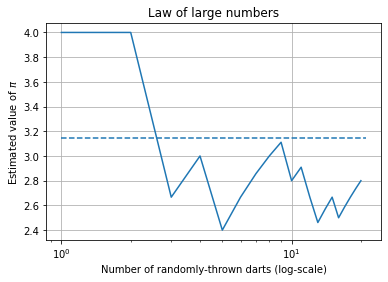

In [31]:
fig, ax = plt.subplots()

ax.plot(num_thrown, running_estimate);
# horizontal line at true value of pi
ax.hlines(y=np.pi, xmin=1, xmax=N+1, linestyles="--")  
ax.set_xscale("log")

ax.set_ylabel(r"Estimated value of $\pi$")
ax.set_xlabel("Number of randomly-thrown darts (log-scale)")
ax.set_title("Law of large numbers")
ax.grid()